In [1]:
import numpy as np
import pandas as pd
import scipy
import math
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.tsa.stattools as stm

## 1. Linear Cong Random Number Generator

In [2]:
# Question 1 - a) Linear Congruential Rand No Generator - Seydel CompFin notes
# np.random.seed(129)
def lin_cong_gen(nsamples, a, b, M):
    gen = np.ones(nsamples)
    for i in range(1,nsamples):
        gen[i] = np.mod((a*gen[i-1] + b),M)
    gen = gen/M
    return gen

In [3]:
# Eg1 - good parameters
nbins=100
nsample=10000
gen = lin_cong_gen(nsample,1597,51749, 244944)

In [4]:
## Test 1 - p must be large, hence M as large as possible.
## in computer with mantissa length l, aim M = 2**l

## Test 2: Statistical Tests (3. above)
# 1. Sample mean and var close to expected/parameters
emp_mean = np.mean(gen)
emp_var = np.var(gen)
print(emp_mean,emp_var)

0.5006168691619309 0.08317202058703156


Text(0.5, 1.0, 'Autocorrelation of Random Number Generator')

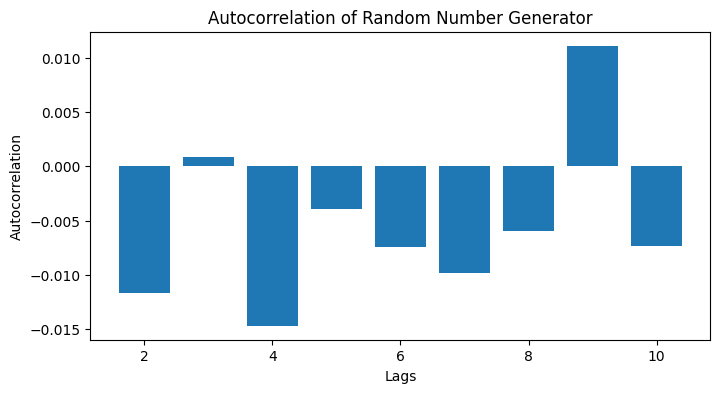

In [5]:
#2. Testing Correlation - arr[i] shouldnt be correlated to arr[i-1]
x=stm.acf(gen, nlags=9)
x = x[1:]
plt.figure(figsize=(8,4))
plt.bar(np.arange(2,11),x)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation of Random Number Generator')

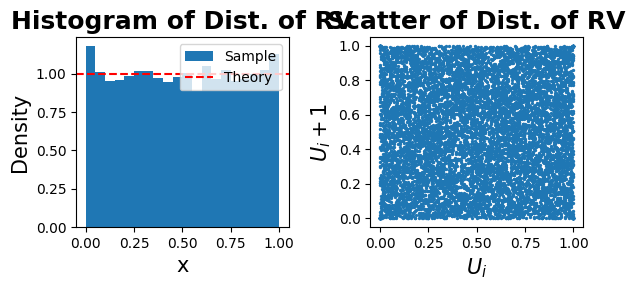

In [38]:
#3. Test sample density (f) versus expected
fig, ax = plt.subplots(1,2,figsize=(6,3)) #sharey= True
ax[0].hist(gen, density=True, bins=20, label='Sample')
ax[0].axhline(y=1,color='r', linestyle='--', label='Theory')
ax[0].legend(loc=0)
ax[0].set_title('Histogram of Dist. of RV', size=18, fontweight='bold')
ax[0].set_ylabel('Density', size=15)
ax[0].set_xlabel('x', size=15)
ax[1].scatter(gen[1:nsample-2],gen[2:nsample-1], s=2)
ax[1].set_title('Scatter of Dist. of RV', size=18, fontweight='bold')
ax[1].set_xlabel('$U_i$', size=15)
ax[1].set_ylabel('$U_i+1$', size=15)
plt.tight_layout()

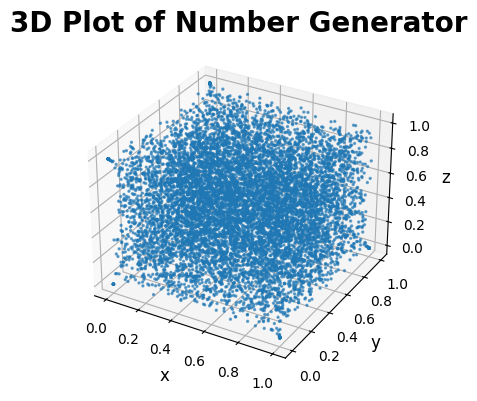

In [36]:
# Test 3: Lattice structure should be ok i.e. random
fig = plt.figure(figsize=(4,4))
ax = fig.add_subplot(projection='3d')
ax.scatter(gen[1:nsample-2], gen[2:nsample-1], gen[3:nsample], s=2, alpha=0.6)
ax.set_title('3D Plot of Number Generator', size=20, fontweight='bold')
ax.set_xlabel('x', size=12)
ax.set_ylabel('y', size=12)
ax.set_zlabel('z', size=12)
plt.tight_layout()

### Eg 2/3 - Pathlogical Examples 

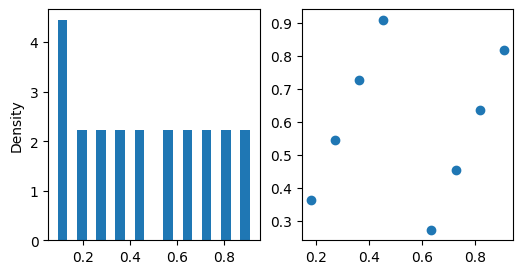

In [34]:
nsamples = 11
gen2 = lin_cong_gen(nsamples,a=2,b=0,M=11)

#Density should be uniform
fig, ax = plt.subplots(1,2,figsize=(6,3))
ax[0].hist(gen2, density=True, bins=20)
ax[0].set_ylabel('Density')
ax[1].scatter(gen2[1:nsamples-2],gen2[2:nsamples-1])

Text(0.5, 0, 'z')

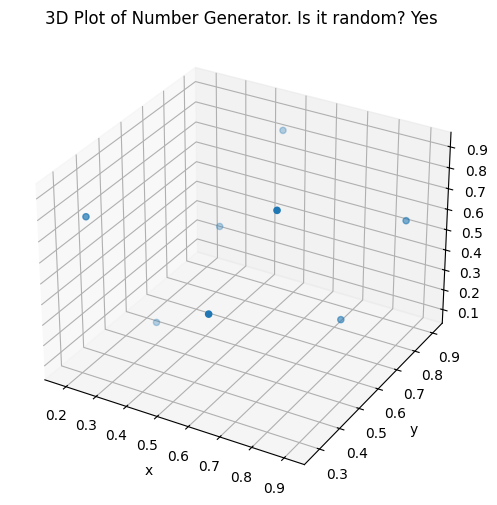

In [31]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(gen2[1:nsamples-2], gen2[2:nsamples-1], gen2[3:nsamples])
ax.set_title('3D Plot of Number Generator. Is it random? Yes')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

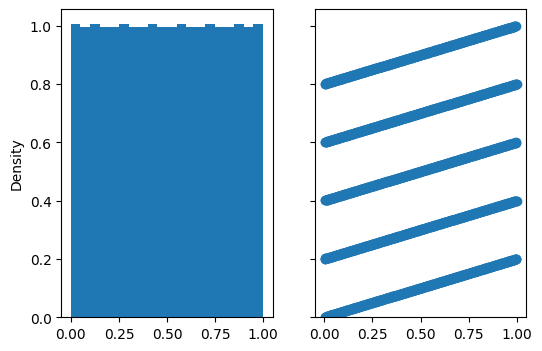

In [39]:
# Eg 3 - Pathological example
nsample = 2048
gen3 = lin_cong_gen(nsample,a=1229,b=1,M=2048)

#Density should be uniform
fig, ax = plt.subplots(1,2,figsize=(6,4), sharey=True)
ax[0].hist(gen3, density=True, bins=20)
ax[0].set_ylabel('Density')
ax[1].scatter(gen3[1:nsample-2],gen3[2:nsample-1])

Text(0.5, 0, 'z')

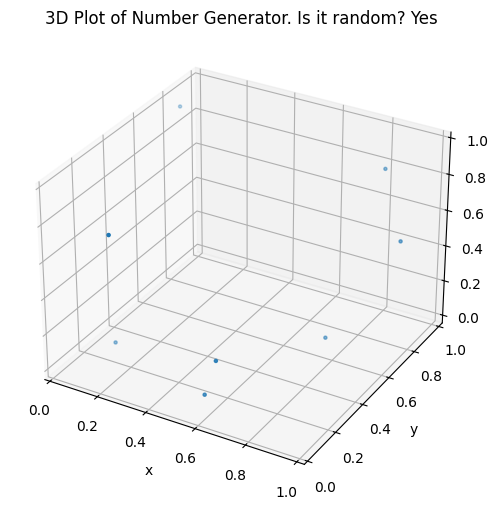

In [30]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(projection='3d')
ax.scatter(gen3[1:nsamples-2], gen3[2:nsamples-1], gen3[3:nsamples], s=5)
ax.set_title('3D Plot of Number Generator. Is it random? Yes')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### Sequences of Numbers with Low Discrepancy

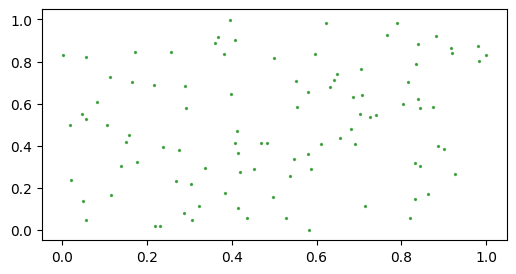

In [40]:
## Going back to the good example (number 1)
nbins=100
nsample=100
gen = lin_cong_gen(nsample,1597,51749, 244944)
plt.figure(figsize=(6,3))
plt.scatter(gen[1:-1],gen[2:], s=2, alpha=0.6, c='g')

In [13]:
from scipy.stats.qmc import Sobol

# Generate a Sobol sequence with two dimensions
num_points = nsample
sobol_points = Sobol(num_points)
sample = sobol_points.random_base2(m=1) #m = 2D

# Compute the discrepancy
vol_Q = np.sum((sample < 0.5).all(axis=1)) / num_points
vol_total = 0.5**2  # Volume of [0, 1]^2
discrepancy = vol_Q / vol_total

# print("{:.6f}".format(your value here));
print(f"Discrepancy:", '{:.6f}'.format(discrepancy))

Discrepancy: 0.000000


## 2. Numerical and Analytical solutions to discover Distributions
"Transformation from uniform to other distributions using the quantile function."

### Transformation Method

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_99751/201401878.py:6: RuntimeWarning: divide by zero encountered in divide
  f = 2/(np.pi*np.sqrt(1-x**2))


(0.6, 3.0)

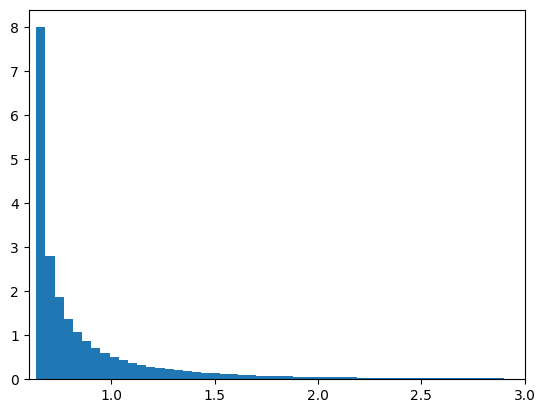

In [45]:
# Compute PDF
ngrid = 200
nsample = 10000

x = np.linspace(0,1,nsample)
f = 2/(np.pi*np.sqrt(1-x**2))
f[-1]=f[-2] #last f was infinity
plt.hist(f,bins=1000, density=True)
plt.xlim(0.6,3)

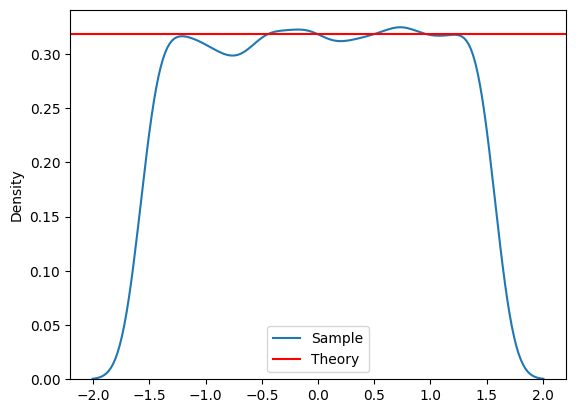

In [46]:
#b)
a = np.pi/2 * -1
b = np.pi/2
y = np.random.uniform(a,b,nsample)
y = np.sort(y)
U = (np.pi * (np.random.rand(nsample)-0.5))
hu, _ = np.histogram(U, bins=y, density=True)
hu /= (nsample * (y[1] - y[0]))

sns.kdeplot(y[1:],label='Sample')
plt.axhline(y=(1/np.pi),label='Theory',c='r')
plt.legend(loc=0)

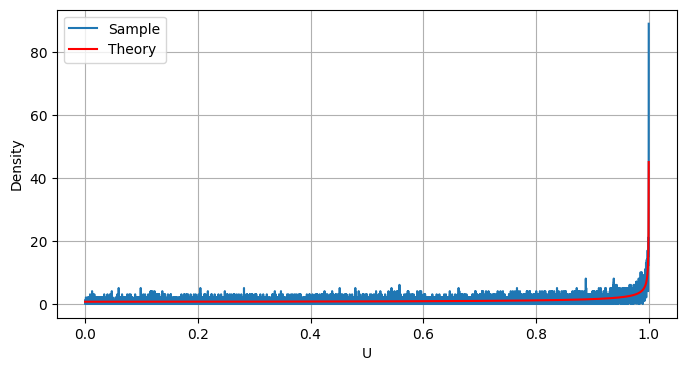

In [16]:
U = np.pi * (np.random.rand(nsample) - 0.5)
X = np.cos(U)
hx, _ = np.histogram(X, bins=x, density=True)
hx /= (nsample * (x[1] - x[0]))

plt.figure(figsize=(8,4))
plt.plot(x[1:], hx, label='Sample')
plt.plot(x,f,'r',label='Theory')
plt.ylabel('Density')
plt.xlabel('U')
plt.legend()
plt.grid()

### Inversion Method

Exponential Dist:

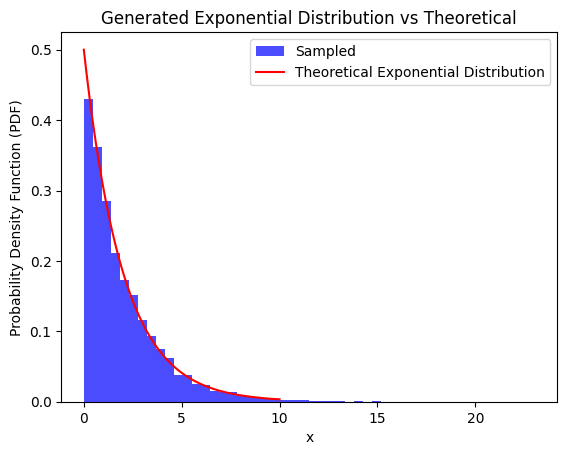

In [17]:
# Function to generate random variables from an exponential distribution
def generate_exponential(n, rate):
    u = np.random.rand(n)  # Generate n uniform random variables in [0, 1)
    x = -np.log(1 - u) / rate  # Inversion method for exponential distribution
    return x

rate = 0.5
num_samples = 10000
exponential_samples = generate_exponential(num_samples, rate)

plt.hist(exponential_samples, bins=50, density=True, alpha=0.7, 
         color='blue',label='Sampled')
x = np.linspace(0, 10, 100)
y = rate * np.exp(-rate * x)
plt.plot(x, y, 'r', label='Theoretical Exponential Distribution')
plt.title('Generated Exponential Distribution vs Theoretical')
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()

Cauchy Dist

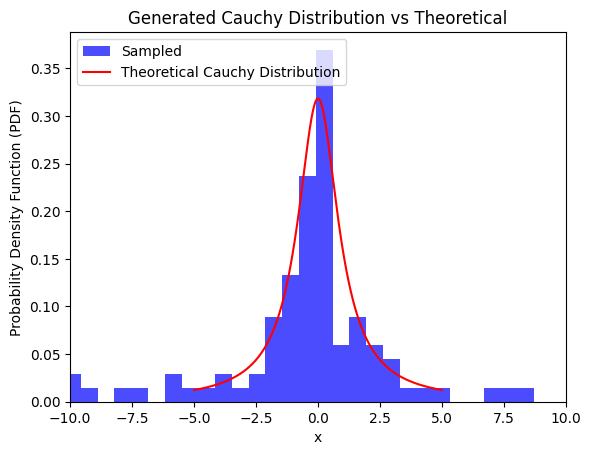

In [150]:
def generate_cauchy(sigma, n, mu):
    u = np.random.rand(n)  # Generate n uniform random variables in [0, 1)
    x = sigma * np.tan(np.pi * (u - 0.5)) + mu  # Inversion method for Cauchy distribution
    return x

cauchy_samples = generate_cauchy(sigma=1, n=100, mu=0)

plt.hist(cauchy_samples, bins=100, density=True, alpha=0.7, color='blue', label='Sampled')
x = np.linspace(-5, 5, 1000)
y = 1 / (np.pi * (1 + x**2))
plt.plot(x, y, 'r', label='Theoretical Cauchy Distribution')
plt.title('Generated Cauchy Distribution vs Theoretical')
plt.xlim(-10,10)
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.legend(loc=2)

Lognormal

/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_99751/361865937.py:14: RuntimeWarning: divide by zero encountered in divide
  theoretical_lognormal = (1 / (x * log_std_dev * np.sqrt(2 * np.pi))) * np.exp(
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_99751/361865937.py:15: RuntimeWarning: divide by zero encountered in log
  -((np.log(x) - log_mean)**2) / (2 * log_std_dev**2))
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_99751/361865937.py:14: RuntimeWarning: invalid value encountered in multiply
  theoretical_lognormal = (1 / (x * log_std_dev * np.sqrt(2 * np.pi))) * np.exp(


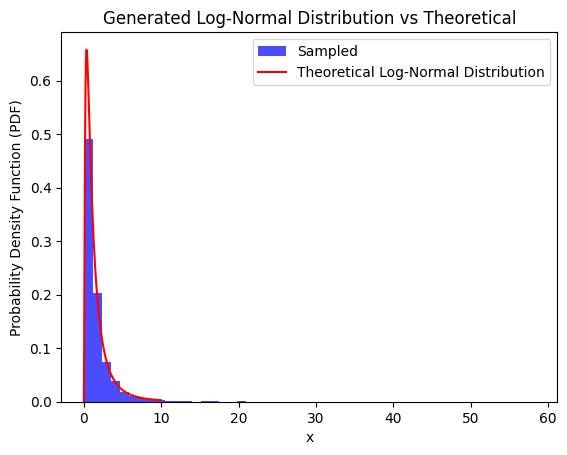

In [19]:
def generate_lognormal(n, mean, std_dev):
    z = np.random.normal(mean, std_dev, n)  # Generate n standard normal random variables
    x = np.exp(z)  # Inversion method for log-normal distribution
    return x

num_samples = 10000
log_mean = 0.0
log_std_dev = 1.0
lognormal_samples = generate_lognormal(num_samples, log_mean, log_std_dev)

plt.hist(lognormal_samples, bins=50, density=True, 
         alpha=0.7, color='blue', label='Sampled')
x = np.linspace(0, 10, 1000)
theoretical_lognormal = (1 / (x * log_std_dev * np.sqrt(2 * np.pi))) * np.exp(
    -((np.log(x) - log_mean)**2) / (2 * log_std_dev**2))
plt.plot(x, theoretical_lognormal, 'r', label='Theoretical Log-Normal Distribution')
plt.title('Generated Log-Normal Distribution vs Theoretical')
plt.xlabel('x')
plt.ylabel('Probability Density Function (PDF)')
plt.legend()


## 3.Fib Generator from Lin Cong Generator

In [20]:
i = 5
j = 17
M = 150889
gen = lin_cong_gen(10000,714025,1366,M=M)
print(len(np.unique(gen)))
for k in range(j,len(gen)):
    x = np.mod(gen[k-j]-gen[k-i],M)
    if x<0: x+=1
    gen[k]=x
gen=gen/M
print(len(np.unique(gen)))

10000
10000


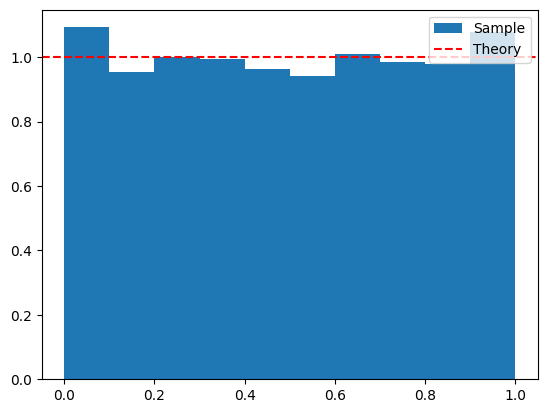

In [21]:
plt.hist(gen, density=True, label='Sample')
plt.axhline(y=1,c='r', label='Theory', linestyle='--')
plt.legend(loc=0)

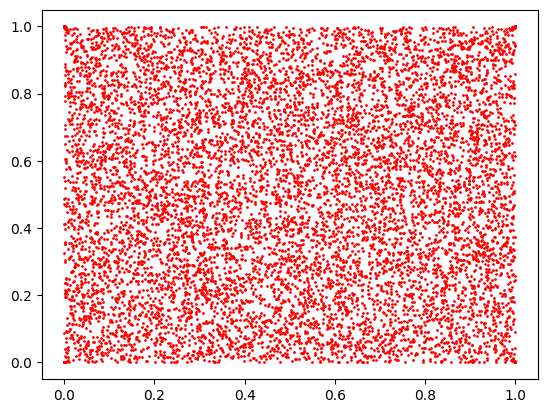

In [22]:
plt.scatter(gen[1:len(gen)-1],gen[2:len(gen)], s=1, c='r')

## 4.Rejection method using Laplace (Double Exponentional) Dist as majorant

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


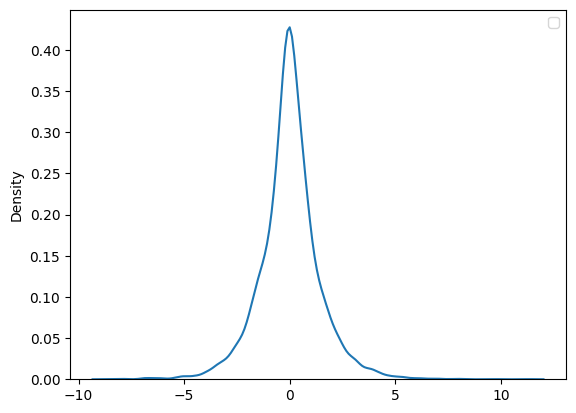

In [24]:
# Sample the standard Laplace or double-sided exponential distribution
nsample=10000
c = np.sqrt(2*np.exp(1)/np.pi) # max(f/g)
U = np.random.rand(nsample)
x = np.linspace(scipy.stats.laplace.ppf(0.01),scipy.stats.laplace.ppf(0.99), 10000)
X = scipy.stats.laplace.pdf(x)
upper,lower = U>=0.5, U<0.5
X = np.log(2*U)*lower-np.log(2*(1-U))*upper

sns.kdeplot(X)
# plt.plot(x,X,label='Laplace PDF')
plt.legend()

In [25]:
# Sample the normal distribution using the acceptance-rejection method
g = 0.5*np.exp(-abs(X))
f = (1/np.sqrt(2*np.pi))*np.exp(-X**2/2)
U2 = np.random.rand(nsample)
cond = c*g*U2 #multiply by a constant to ensure majorant function always larger
N= X[cond<=f]

print(len(N)/nsample) # acceptance ratio
print(c) # analytical value
print(max(f/g)) # numerical check

0.7527
1.315489246958914
1.315489246878269


<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
<>:12: SyntaxWarning: invalid escape sequence '\m'
<>:14: SyntaxWarning: invalid escape sequence '\m'
<>:19: SyntaxWarning: invalid escape sequence '\m'
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_99751/4273462443.py:12: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x,x**2-2*x+1,'--g', label='$\mathregular{x^{2}-2x+1}$')
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_99751/4273462443.py:14: SyntaxWarning: invalid escape sequence '\m'
  plt.plot(x,c*np.ones(len(x)), label='$\mathregular{c=(2e/\pi)^{0.5}}$')
/var/folders/sg/z_br3z317db2fzjxdgwhxkg40000gn/T/ipykernel_99751/4273462443.py:19: SyntaxWarning: invalid escape sequence '\m'
  plt.title('$\mathregular{x^{2}-2x+1}$ = 0 where f/g = max = c')


Text(0.5, 1.0, '$\\mathregular{x^{2}-2x+1}$ = 0 where f/g = max = c')

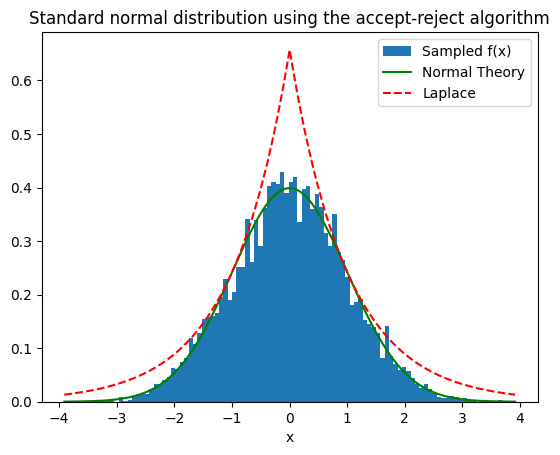

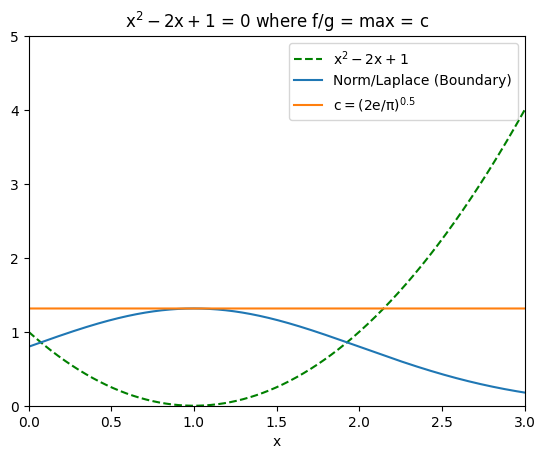

In [26]:
plt.figure(1)
plt.hist(N, density=True,bins=100, label='Sampled f(x)')
fx = 1/np.sqrt(2*np.pi)*np.exp(-(x**2)/2)
gx = 0.5*np.exp(-abs(x))
plt.plot(x,fx,'g',label='Normal Theory')
plt.plot(x,c*gx,'r--', label = 'Laplace')
plt.xlabel('x')
plt.legend(loc=0)
plt.title('Standard normal distribution using the accept-reject algorithm')

plt.figure(2)
plt.plot(x,x**2-2*x+1,'--g', label='$\mathregular{x^{2}-2x+1}$')
plt.plot(x,fx/gx, label='Norm/Laplace (Boundary)')
plt.plot(x,c*np.ones(len(x)), label='$\mathregular{c=(2e/\pi)^{0.5}}$')
plt.xlim(0, 3)
plt.ylim(0,5)
plt.xlabel('x')
plt.legend(loc=0)
plt.title('$\mathregular{x^{2}-2x+1}$ = 0 where f/g = max = c')

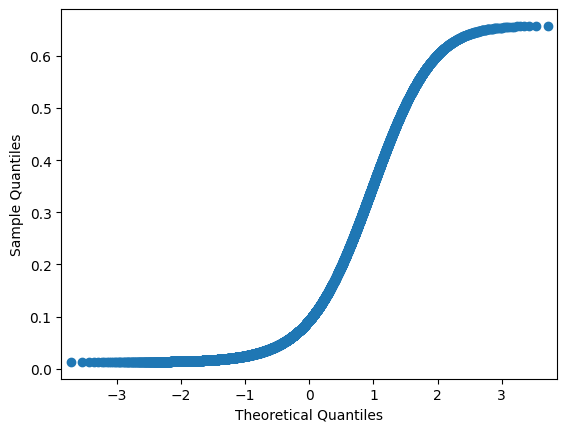

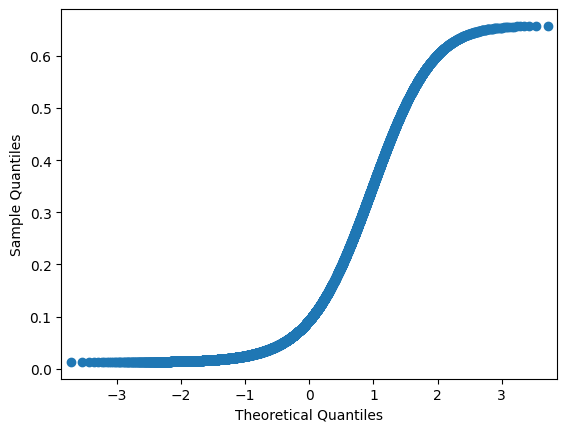

In [27]:
import statsmodels.api as sm 
f = c*gx
sm.qqplot(f)